In [408]:
%env OMP_NUM_THREADS = 10


env: OMP_NUM_THREADS=10


In [409]:

from pathlib import Path # to interact with file system.
import string
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, pairwise
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from dmba import plotDecisionTree, classificationSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.linear_model import LinearRegression

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import seaborn as sns
from pandas.plotting import parallel_coordinates

%matplotlib inline 
import matplotlib.pylab as plt

In [410]:
#Load the Restaurant_Scores_-_LIVES_Standard data
restaurant_scores_df = pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')
restaurant_scores_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,...,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,...,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,...,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,...,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [411]:
restaurant_scores_df["inspection_type"].value_counts()

Routine - Unscheduled                39638
Reinspection/Followup                 6718
Complaint                             2399
New Ownership                         1914
New Construction                       999
Non-inspection site visit              847
New Ownership - Followup               531
Structural Inspection                  402
Complaint Reinspection/Followup        232
Foodborne Illness Investigation        203
Routine - Scheduled                     74
Special Event                            8
Administrative or Document Review        4
Multi-agency Investigation               3
Community Health Assessment              1
Name: inspection_type, dtype: int64

In [412]:
restaurant_scores_df["risk_category"].value_counts()

Low Risk         19112
Moderate Risk    15316
High Risk         5825
Name: risk_category, dtype: int64

In [435]:
restaurant_scores_df.index

RangeIndex(start=0, stop=53973, step=1)

In [413]:
restaurant_scores_df.describe()

,business_id,business_latitude,business_longitude,business_phone_number,inspection_score,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
count,53973.000000,27475.000000,27475.000000,1.767200e+04,39541.000000,27435.000000,27435.000000,27447.000000,27447.000000,27447.000000
mean,55218.877883,37.750969,-122.360157,1.415541e+10,86.221669,56.963149,56.963149,5.359165,5.632055,19.459868
std,36165.556449,0.882643,2.859985,1.356438e+06,8.489218,34.804693,34.804693,2.687570,3.298057,11.615126
min,19.000000,0.000000,-122.510896,1.415020e+10,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7558.000000,37.756133,-122.437069,1.415537e+10,81.000000,28.000000,28.000000,3.000000,3.000000,8.000000
50%,69186.000000,37.780133,-122.419107,1.415561e+10,87.000000,53.000000,53.000000,6.000000,5.000000,20.000000
75%,86385.000000,37.788864,-122.407417,1.415580e+10,92.000000,95.000000,95.000000,8.000000,9.000000,30.000000
max,102705.000000,37.824494,0.000000,1.415988e+10,100.000000,117.000000,117.000000,10.000000,11.000000,41.000000


In [451]:
rest_score=restaurant_scores_df.drop(columns=['business_id','business_location','business_name','business_address','business_latitude','business_longitude','business_city','inspection_id','inspection_date','violation_id','business_state','business_postal_code','business_phone_number'])
print(rest_score.index)
#rest_score['violation_id'] = rest_score['violation_id'].astype('category')
#rest_score['inspection_id'] = rest_score['inspection_id'].astype('category')
#rest_score['business_latitude'] = rest_score['business_latitude'].astype('category')
#rest_score['business_longitude'] = rest_score['business_longitude'].astype('category')
rest_score['inspection_score'] = rest_score['inspection_score'].astype('double')
rest_score['Neighborhoods'] = rest_score['Neighborhoods'].astype('double')
rest_score['SF Find Neighborhoods'] = rest_score['SF Find Neighborhoods'].astype('double')
rest_score['Current Police Districts'] = rest_score['Current Police Districts'].astype('double')
rest_score['Current Supervisor Districts'] = rest_score['Current Supervisor Districts'].astype('double')
rest_score['Analysis Neighborhoods'] = rest_score['Analysis Neighborhoods'].astype('double')

RangeIndex(start=0, stop=53973, step=1)


In [452]:
rest_score.index

RangeIndex(start=0, stop=53973, step=1)

In [453]:

pd.DataFrame(rest_score).isna().sum()

inspection_score                14432
inspection_type                     0
violation_description           13720
risk_category                   13720
Neighborhoods                   26538
SF Find Neighborhoods           26538
Current Police Districts        26526
Current Supervisor Districts    26526
Analysis Neighborhoods          26526
dtype: int64

In [454]:

rest_score = rest_score.dropna(subset=['risk_category'])
pd.DataFrame(rest_score).isna().sum()

inspection_score                 2783
inspection_type                     0
violation_description               0
risk_category                       0
Neighborhoods                   18596
SF Find Neighborhoods           18596
Current Police Districts        18586
Current Supervisor Districts    18586
Analysis Neighborhoods          18586
dtype: int64

In [455]:
# fixing categoricals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant',fill_value="Missing")
imputer.fit(rest_score.select_dtypes(exclude=['int64','float64']))
rest_score[rest_score.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(rest_score.select_dtypes(exclude=['int64','float64']))
           
# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='constant', fill_value=0)
imputer.fit(rest_score.select_dtypes(include=['int64','float64']))
rest_score[rest_score.select_dtypes(include=['int64','float64']).columns] = imputer.transform(rest_score.select_dtypes(include=['int64','float64']))


In [456]:
pd.DataFrame(rest_score).isna().sum()

inspection_score                0
inspection_type                 0
violation_description           0
risk_category                   0
Neighborhoods                   0
SF Find Neighborhoods           0
Current Police Districts        0
Current Supervisor Districts    0
Analysis Neighborhoods          0
dtype: int64

In [457]:
rest_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40253 entries, 4 to 53969
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   inspection_score              40253 non-null  float64
 1   inspection_type               40253 non-null  object 
 2   violation_description         40253 non-null  object 
 3   risk_category                 40253 non-null  object 
 4   Neighborhoods                 40253 non-null  float64
 5   SF Find Neighborhoods         40253 non-null  float64
 6   Current Police Districts      40253 non-null  float64
 7   Current Supervisor Districts  40253 non-null  float64
 8   Analysis Neighborhoods        40253 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


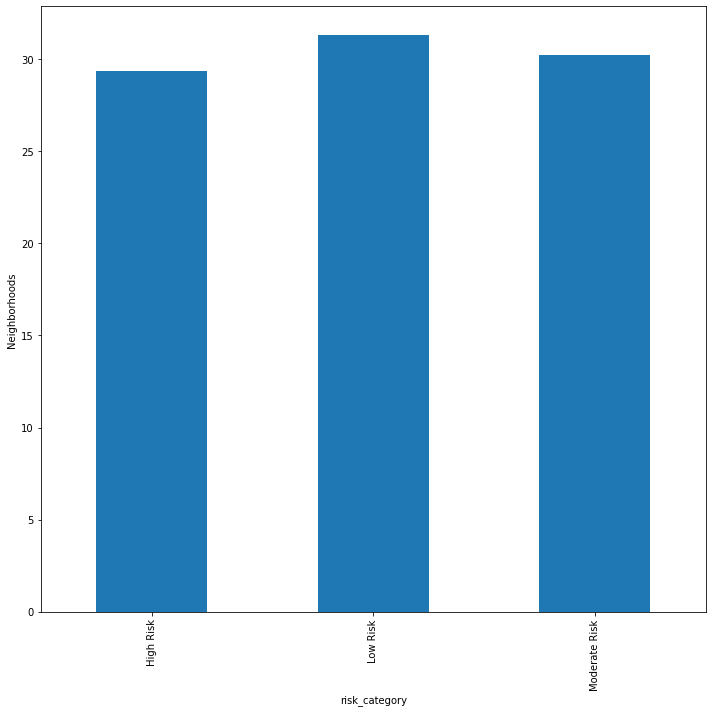

In [458]:
bx = rest_score.groupby('risk_category').mean().Neighborhoods.plot(kind='bar', figsize=[10, 10])
bx.set_ylabel('Neighborhoods')

plt.tight_layout()
plt.show()

In [459]:

rest2_df=rest_score

In [460]:
rest_score.index

Int64Index([    4,    12,    15,    23,    33,    48,    49,    52,    60,
               64,
            ...
            53921, 53924, 53925, 53926, 53940, 53942, 53944, 53959, 53964,
            53969],
           dtype='int64', length=40253)

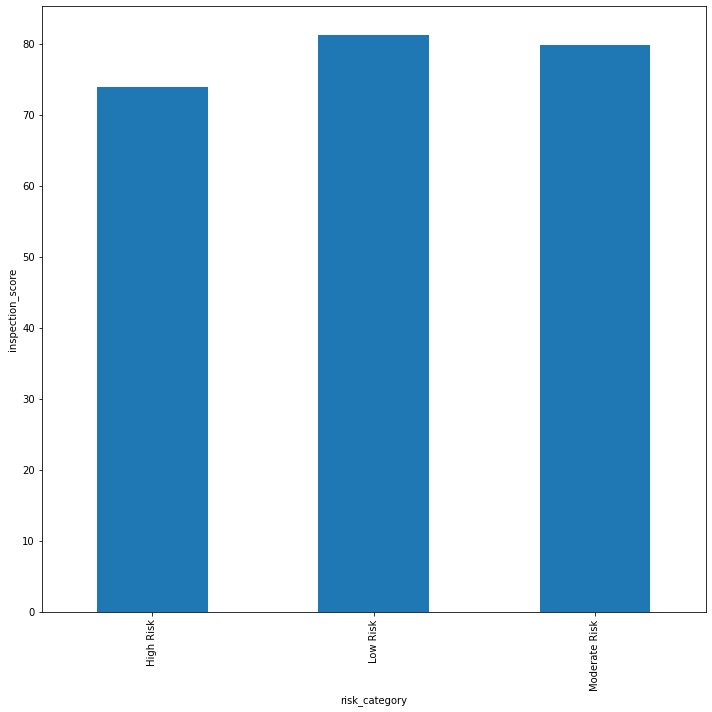

In [461]:
bx = rest_score.groupby('risk_category').mean().inspection_score.plot(kind='bar', figsize=[10, 10])
bx.set_ylabel('inspection_score')

plt.tight_layout()
plt.show()

In [462]:

X1 = rest2_df.drop(columns=['risk_category'])
X = pd.get_dummies(X1, prefix_sep='_', drop_first=True)
y = rest2_df[['risk_category']]
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state = 0)


In [463]:
X1.columns

Index(['inspection_score', 'inspection_type', 'violation_description',
       'Neighborhoods', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods'],
      dtype='object')

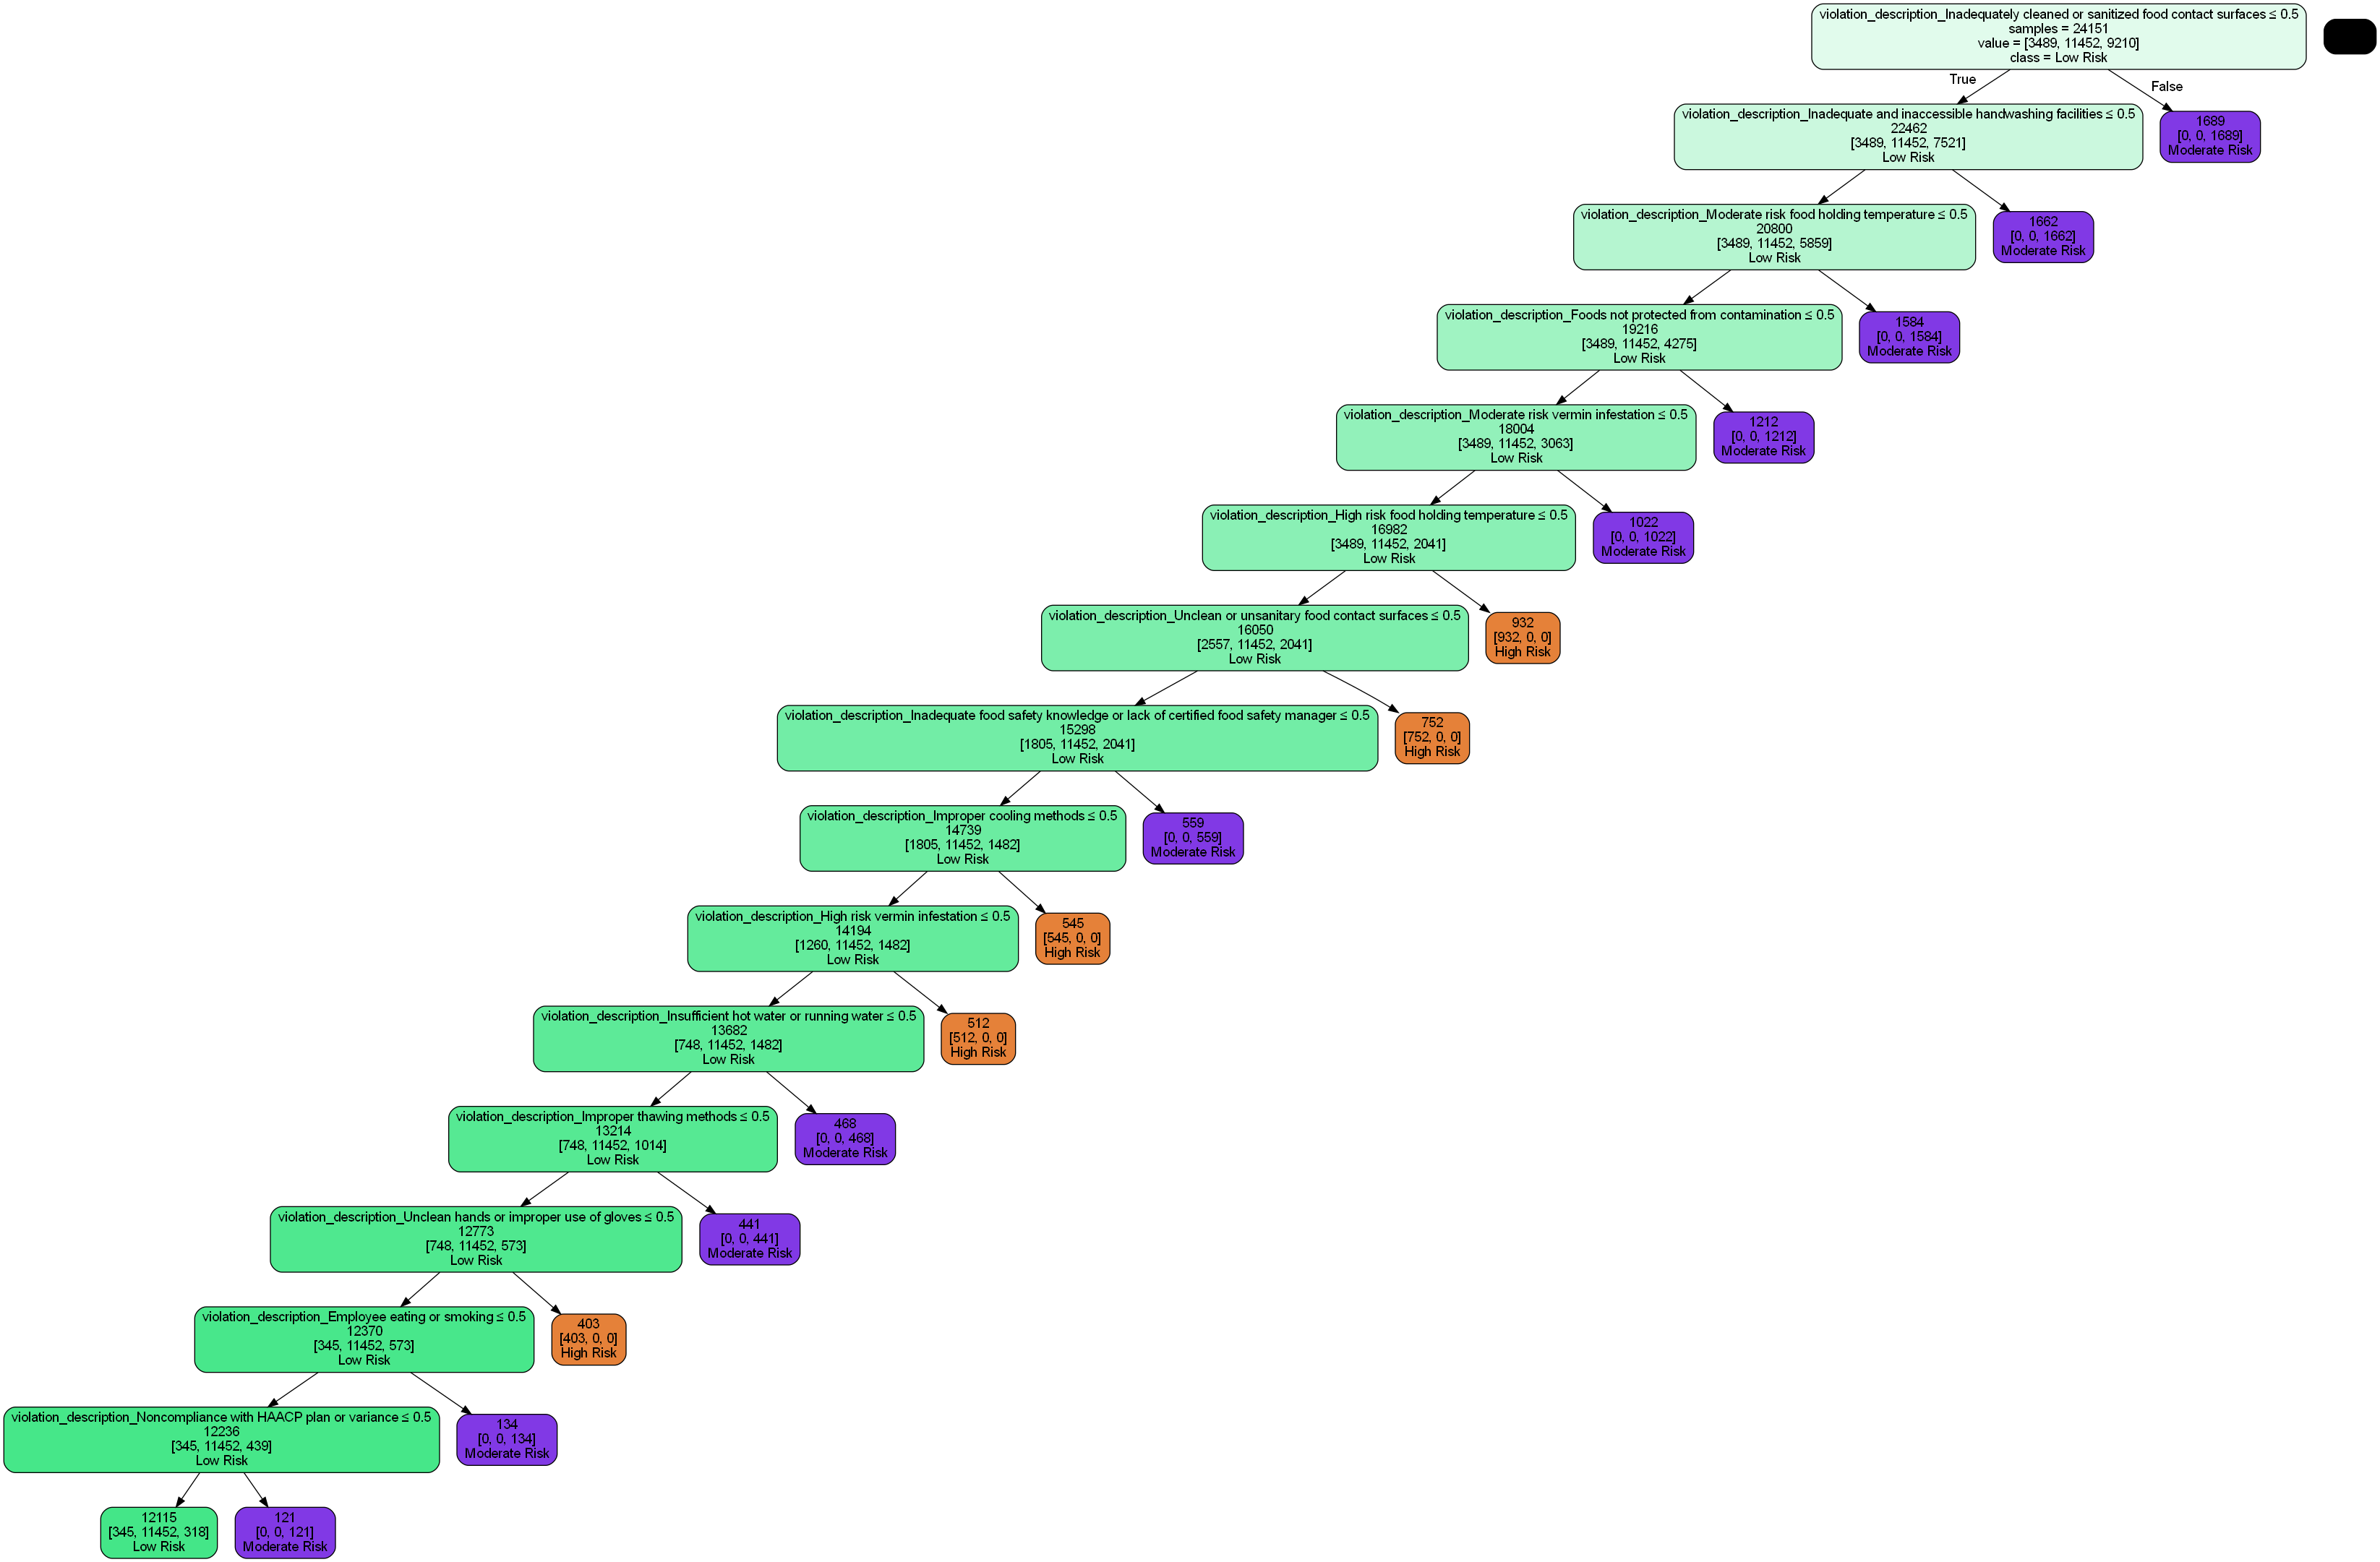

In [464]:
  
# training a DescisionTreeClassifier

classTree = DecisionTreeClassifier(random_state=0, max_depth=15)
classTree.fit(X_train, y_train)

#print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=X.columns, class_names=classTree.classes_)

In [465]:
classificationSummary(y_test, classTree.predict(X_test))

Confusion Matrix (Accuracy 0.9735)

       Prediction
Actual    0    1    2
     0 2113  223    0
     1    0 7660    0
     2    0  203 5903


In [466]:
accuracy_score(y_test, classTree.predict(X_test))

0.9735436591727735

In [488]:
rest2_df.index

Int64Index([    4,    12,    15,    23,    33,    48,    49,    52,    60,
               64,
            ...
            53921, 53924, 53925, 53926, 53940, 53942, 53944, 53959, 53964,
            53969],
           dtype='int64', length=40253)

In [489]:
#x= rest2_df.drop(columns=['risk_category']).columns
rest2_df.index = range(0, 40253)
df = pd.get_dummies(rest2_df, prefix_sep='_',columns=['inspection_type','violation_description'] ,drop_first=True)
#y = rest2_df[['risk_category']]
#result = pd.concat([X, y], axis=1, join='inner')

# dividing X, y into train and test data
rest_train, rest_test = train_test_split(df,test_size=0.4, random_state =1)


In [490]:
df.index

RangeIndex(start=0, stop=40253, step=1)

In [529]:
x=list(df.drop(columns=['risk_category']).columns)


In [493]:
df.head()

,inspection_score,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,inspection_type_Complaint Reinspection/Followup,inspection_type_Foodborne Illness Investigation,inspection_type_New Construction,...,violation_description_Unauthorized or unsafe use of time as a public health control measure,violation_description_Unclean hands or improper use of gloves,violation_description_Unclean nonfood contact surfaces,violation_description_Unclean or degraded floors walls or ceilings,violation_description_Unclean or unsanitary food contact surfaces,violation_description_Unclean unmaintained or improperly constructed toilet facilities,violation_description_Unpermitted food facility,violation_description_Unsanitary employee garments hair or nails,violation_description_Wiping cloths not clean or properly stored or inadequate sanitizer,violation_description_Worker safety hazards
0,96.0,Low Risk,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,92.0,Low Risk,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,96.0,Moderate Risk,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78.0,Moderate Risk,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90.0,Low Risk,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [494]:
rest2_df.index

RangeIndex(start=0, stop=40253, step=1)

In [495]:
rest_train.index

Int64Index([16919, 17619, 14604, 17468, 19446, 26328,  1224, 33271,  2257,
            28981,
            ...
            31228,  7751, 20609, 32912, 21440,  7813, 32511,  5192, 12172,
            33003],
           dtype='int64', length=24151)

In [516]:
#x=rest_train.drop(columns=['risk_category'])
scaler = preprocessing.StandardScaler()
scaler.fit(rest_train[x])# Note the use of an array of column names

# Transform the full dataset
#rNorm = preprocessing.normalize([X])
rNorm = pd.concat([pd.DataFrame(scaler.transform(df[x]),columns=x),pd.DataFrame(df['risk_category'])],axis=1)
#restNorm = pd.concat([result[X.columns],result['risk_category']])
trainNorm = rNorm.iloc[rest_train.index]
trainNorm.head()
#Similarly, get the valid one as well
validNorm = rNorm.iloc[rest_test.index]


In [527]:
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[x], trainNorm['risk_category'])


In [531]:
distances, indices = knn.kneighbors(validNorm[x])
accuracy_score(validNorm['risk_category'], knn.predict(validNorm[x]))

0.9592597192895292

In [ ]:
train_X = trainNorm[x]
train_y = trainNorm['risk_category']
valid_X = validNorm[x]
valid_y = validNorm['risk_category']

# Train a classifier for different values of k
results = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)